Unit 3 - Exercises

In [15]:
# Import libraries
import pandas as pd
import plotnine as pn

In [16]:
# Create DataFrame
athletes_data = pd.read_csv('./athlete_events.csv')

Ejercicio 2.a

Crear un gráfico de barras apiladas que muestre la distribución de las medallas ganadas por los atletas de Rusia por año y género. Crea los gráficos separados en dos columnas.

In [17]:
russian_athletes = athletes_data[athletes_data["Team"] == "Russia"]
russian_medalist_athletes = russian_athletes[russian_athletes["Medal"].notna()]

# This assumes you have a 'Medal' column in the dataframe after the grouping
russian_medalist_athletes_yearly = russian_medalist_athletes.groupby(["Year", "Sex"])[
    "Medal"].count().reset_index(name='Count')


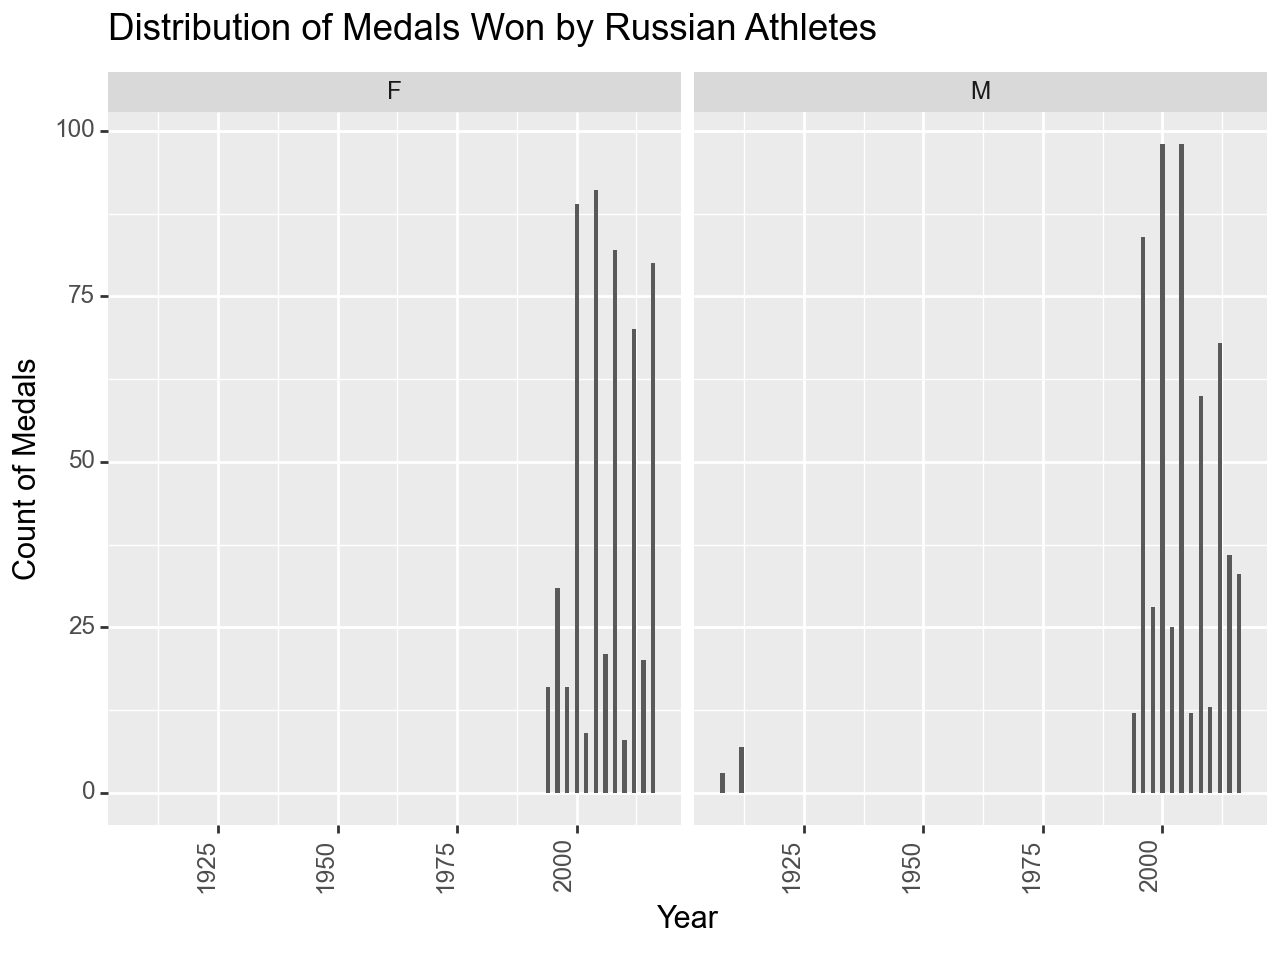

In [18]:
# Create the stacked bar chart
stacked_bar_chart = (
        pn.ggplot(russian_medalist_athletes_yearly, pn.aes(**{"x": 'Year', "y": 'Count'})) +
        pn.geom_bar(stat='identity', position='stack') +  # Use 'identity' to use the counts in 'Count'
        pn.facet_wrap('~Sex', ncol=2) +  # Split the charts into two columns by gender
        pn.ggtitle('Distribution of Medals Won by Russian Athletes') +
        pn.xlab('Year') +
        pn.ylab('Count of Medals') +
        pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1))
)

# Display the chart
stacked_bar_chart.draw()

Ejercicio 2.b

Modificar el gráfico anterior para mostrar los gráficos en 2 filas separadas.

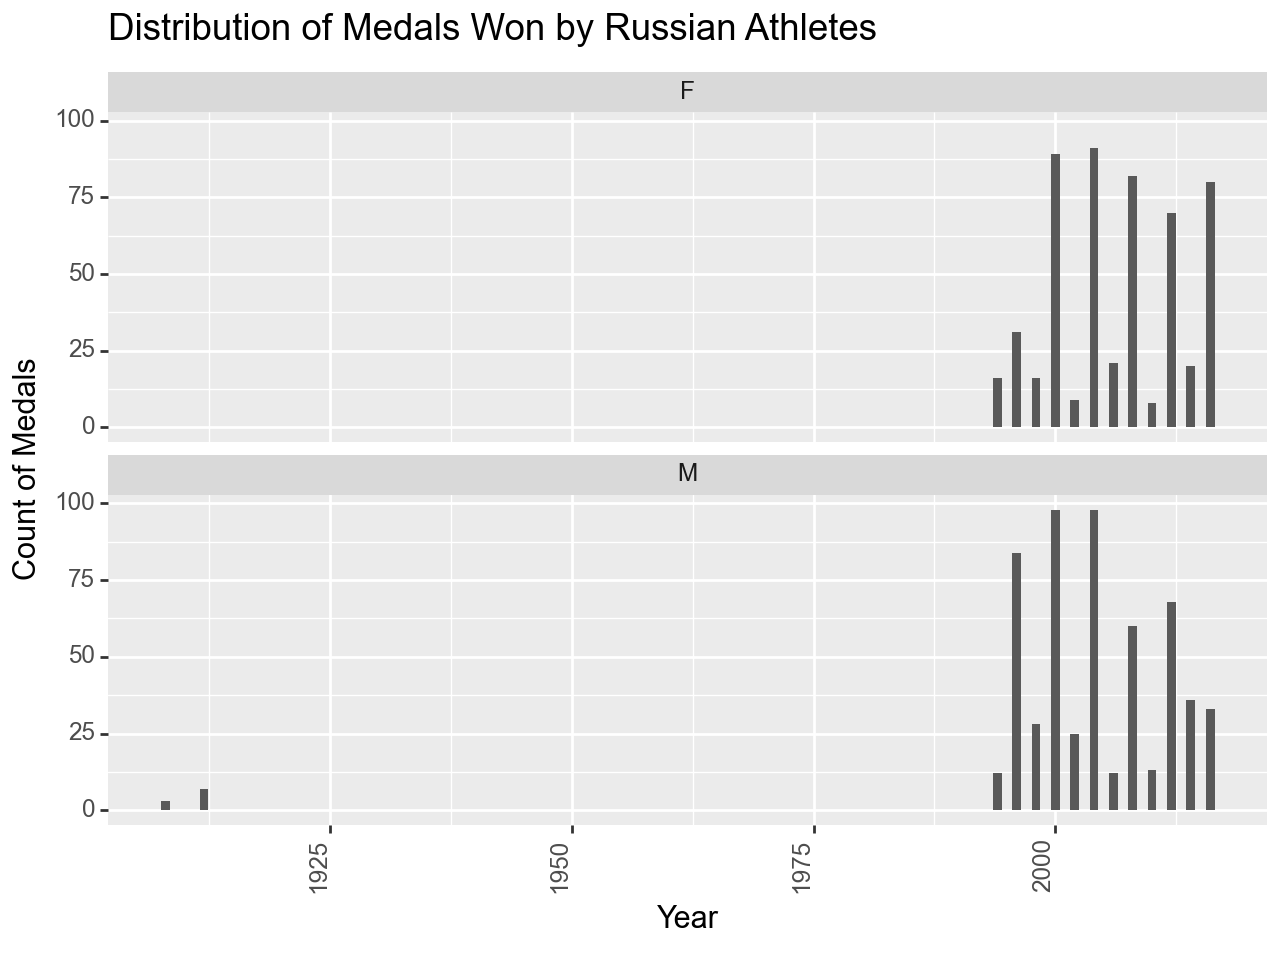

In [19]:
# Create the stacked bar chart
stacked_bar_chart = (
        pn.ggplot(russian_medalist_athletes_yearly, pn.aes(**{"x": 'Year', "y": 'Count'})) +
        pn.geom_bar(stat='identity', position='stack') +  # Use 'identity' to use the counts in 'Count'
        pn.facet_wrap('~Sex', nrow=2) +  # Split the charts into two columns by gender
        pn.ggtitle('Distribution of Medals Won by Russian Athletes') +
        pn.xlab('Year') +
        pn.ylab('Count of Medals') +
        pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1))
)

# Display the chart
stacked_bar_chart.draw()

Ejercicio 2.c

Modificar el gráfico anterior para mostrar las columnas de medallistas hombres y mujeres juntas.

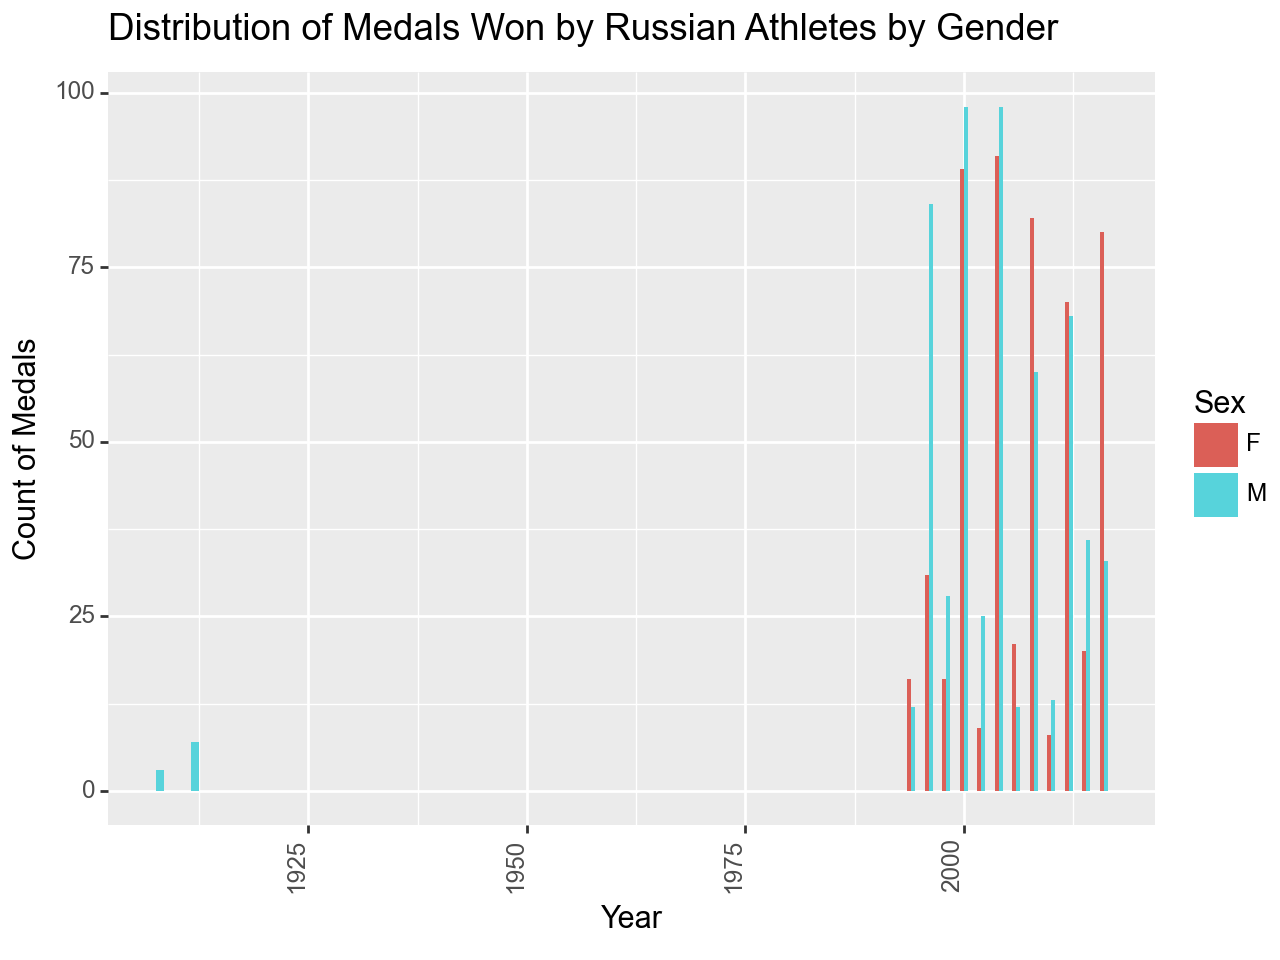

In [20]:
# Create the stacked bar chart
stacked_bar_chart = (
        pn.ggplot(russian_medalist_athletes_yearly, pn.aes(**{"x": 'Year', "y": 'Count', "fill": 'Sex'})) +
        pn.geom_bar(stat='identity', position='dodge') +  # Use 'dodge' to place bars side by side
        pn.ggtitle('Distribution of Medals Won by Russian Athletes by Gender') +
        pn.xlab('Year') +
        pn.ylab('Count of Medals') +
        pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1))
)

# Display the chart
stacked_bar_chart.draw()

Ejercicio 2.d

Vuelve a crear el gráfico del ejercicio 2.c eliminando los datos anteriores a 1994.

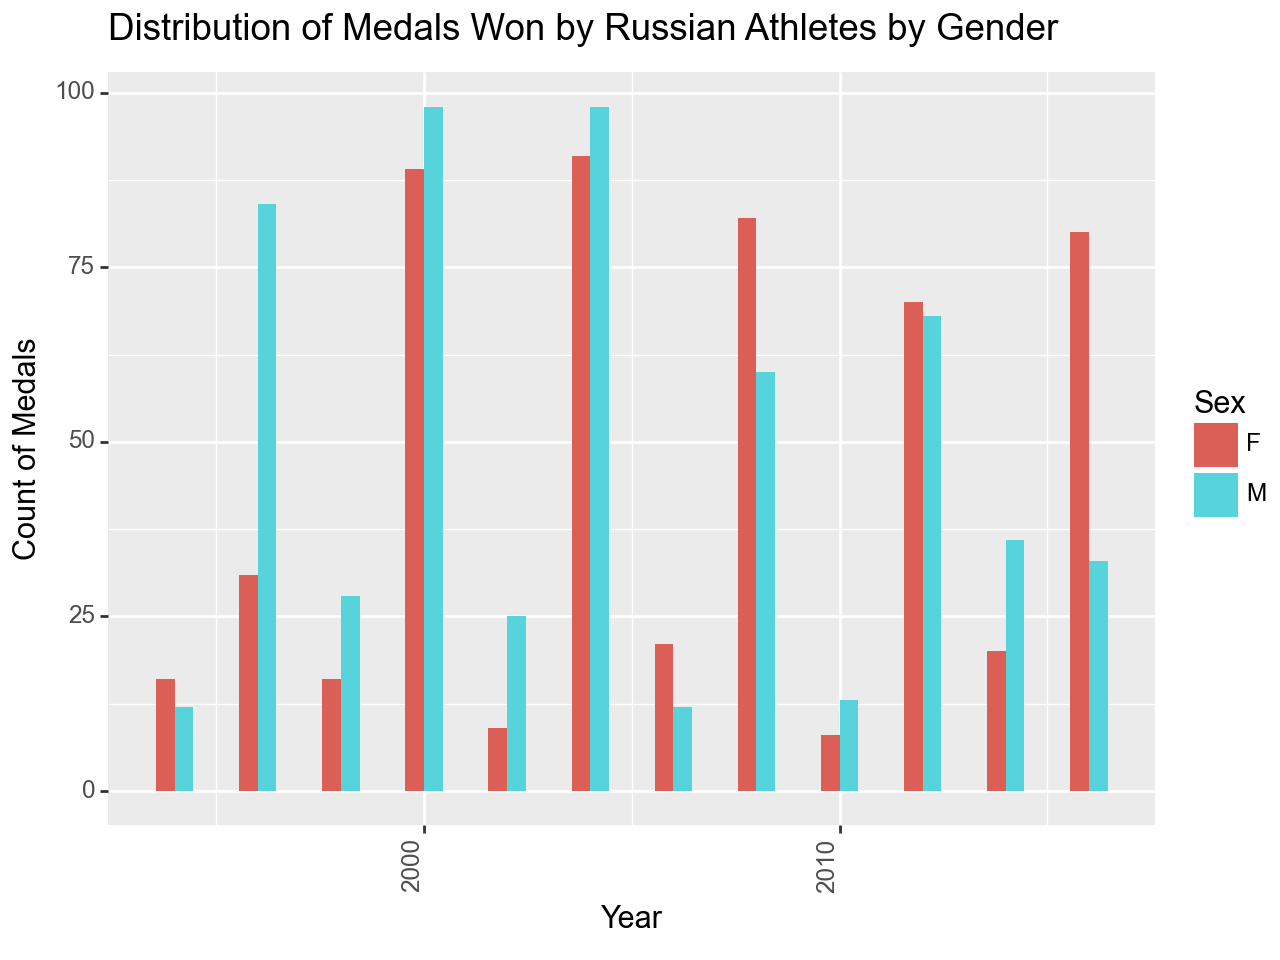

In [21]:
russian_medalist_athletes_yearly_recent = russian_medalist_athletes_yearly[
    russian_medalist_athletes_yearly["Year"] >= 1994]
# Create the stacked bar chart
stacked_bar_chart = (
        pn.ggplot(russian_medalist_athletes_yearly_recent, pn.aes(**{"x": 'Year', "y": 'Count', "fill": 'Sex'})) +
        pn.geom_bar(stat='identity', position='dodge') +  # Use 'dodge' to place bars side by side
        pn.ggtitle('Distribution of Medals Won by Russian Athletes by Gender') +
        pn.xlab('Year') +
        pn.ylab('Count of Medals') +
        pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1))
)

# Display the chart
stacked_bar_chart.draw()

Ejercicio 2.e

Averigua como modificar el gráfico del ejercicio anterior para que se muestre parecido al siguiente:

C:\Users\jsanchez\AppData\Local\Temp\ipykernel_23692\2146226887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


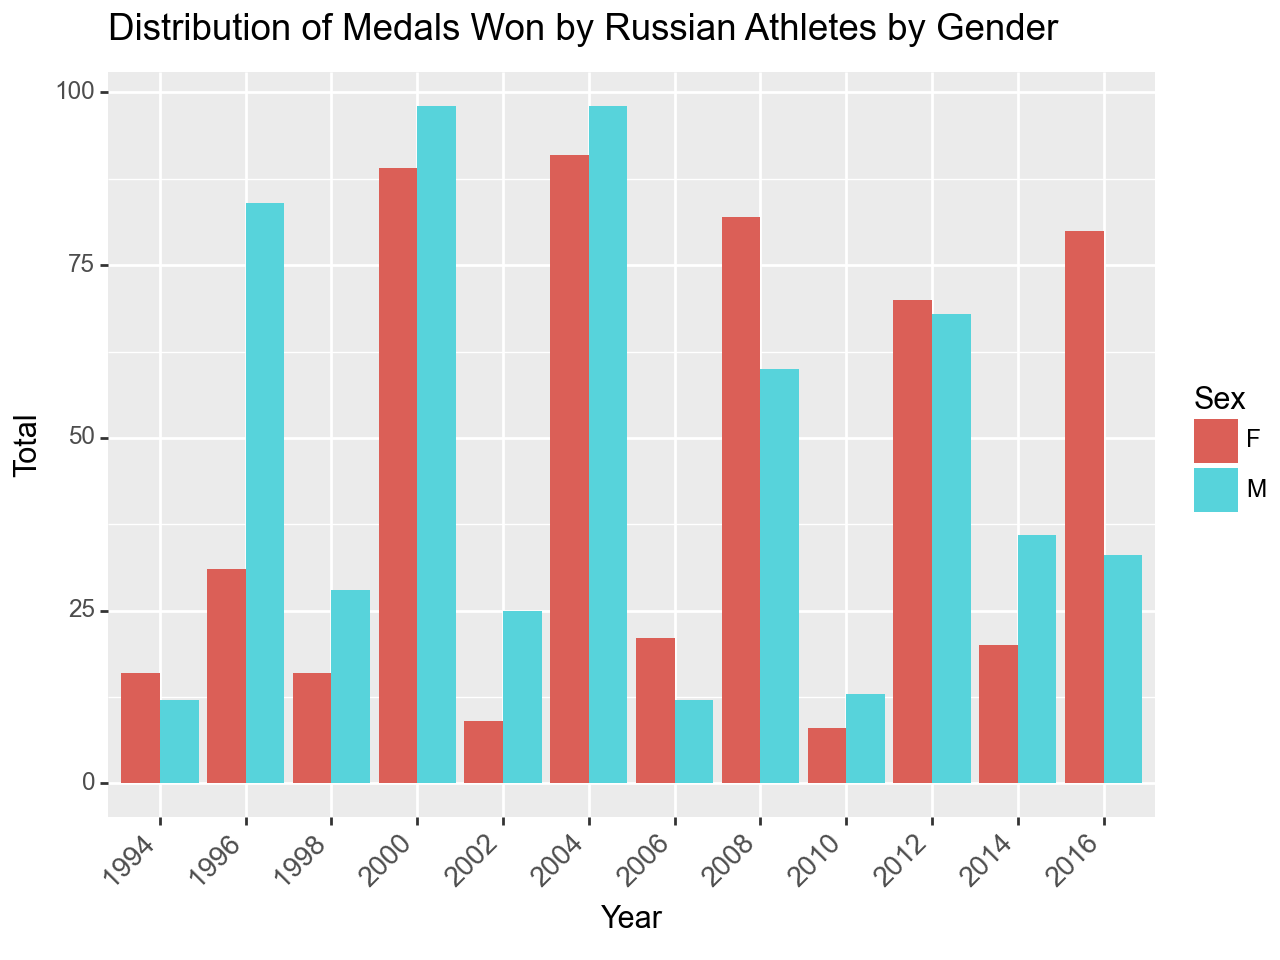

In [24]:
# Ensure that 'Year' is treated as a categorical variable by converting it to a string if it's not already
russian_medalist_athletes_yearly_recent['Year'] = russian_medalist_athletes_yearly_recent.loc['Year'].astype(str)

# Get all unique years from the data frame for the x-axis labels
unique_years = russian_medalist_athletes_yearly_recent['Year'].unique()

stacked_bar_chart = (
        pn.ggplot(russian_medalist_athletes_yearly_recent, pn.aes(**{"x": 'Year', "y": 'Count', "fill": 'Sex'})) +
        pn.geom_bar(stat='identity', position='dodge') +
        pn.ggtitle('Distribution of Medals Won by Russian Athletes by Gender') +
        pn.xlab('Year') +
        pn.ylab('Total') +
        pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1, size=10)) +
        pn.scale_x_discrete(limits=unique_years)  # Set the limits to include all unique years
)

# Display the chart
stacked_bar_chart.draw()